<a href="https://colab.research.google.com/github/deepenmi/Machine-Learning-Basics/blob/master/NeuralNetworkRegressor_usgs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
dataset = pd.read_csv('TankSpectra.csv')
dataset.head(5)

,MeanDyeConcentrationPPB,MeanTurbidityNTU,Reflectance@400nm,Reflectance@401nm,Reflectance@402nm,Reflectance@403nm,Reflectance@404nm,Reflectance@405nm,Reflectance@406nm,Reflectance@407nm,Reflectance@408nm,Reflectance@409nm,Reflectance@410nm,Reflectance@411nm,Reflectance@412nm,Reflectance@413nm,Reflectance@414nm,Reflectance@415nm,Reflectance@416nm,Reflectance@417nm,Reflectance@418nm,Reflectance@419nm,Reflectance@420nm,Reflectance@421nm,Reflectance@422nm,Reflectance@423nm,Reflectance@424nm,Reflectance@425nm,Reflectance@426nm,Reflectance@427nm,Reflectance@428nm,Reflectance@429nm,Reflectance@430nm,Reflectance@431nm,Reflectance@432nm,Reflectance@433nm,Reflectance@434nm,Reflectance@435nm,Reflectance@436nm,Reflectance@437nm,...,Reflectance@861nm,Reflectance@862nm,Reflectance@863nm,Reflectance@864nm,Reflectance@865nm,Reflectance@866nm,Reflectance@867nm,Reflectance@868nm,Reflectance@869nm,Reflectance@870nm,Reflectance@871nm,Reflectance@872nm,Reflectance@873nm,Reflectance@874nm,Reflectance@875nm,Reflectance@876nm,Reflectance@877nm,Reflectance@878nm,Reflectance@879nm,Reflectance@880nm,Reflectance@881nm,Reflectance@882nm,Reflectance@883nm,Reflectance@884nm,Reflectance@885nm,Reflectance@886nm,Reflectance@887nm,Reflectance@888nm,Reflectance@889nm,Reflectance@890nm,Reflectance@891nm,Reflectance@892nm,Reflectance@893nm,Reflectance@894nm,Reflectance@895nm,Reflectance@896nm,Reflectance@897nm,Reflectance@898nm,Reflectance@899nm,Reflectance@900nm
0,2.32,43.4,0.0461,0.0460,0.0459,0.0459,0.0460,0.0461,0.0462,0.0463,0.0465,0.0466,0.0468,0.0469,0.0471,0.0472,0.0473,0.0475,0.0477,0.0478,0.0480,0.0482,0.0484,0.0486,0.0488,0.0489,0.0491,0.0493,0.0494,0.0496,0.0498,0.0500,0.0502,0.0503,0.0505,0.0507,0.0510,0.0512,0.0514,0.0516,...,0.0252,0.0250,0.0248,0.0247,0.0244,0.0242,0.0240,0.0238,0.0235,0.0233,0.0231,0.0229,0.0227,0.0225,0.0224,0.0222,0.0221,0.0219,0.0218,0.0217,0.0215,0.0214,0.0212,0.0210,0.0209,0.0207,0.0206,0.0204,0.0203,0.0201,0.0200,0.0198,0.0197,0.0196,0.0195,0.0194,0.0193,0.0192,0.0191,0.0190
1,2.32,43.4,0.0520,0.0520,0.0520,0.0521,0.0522,0.0524,0.0525,0.0527,0.0529,0.0531,0.0533,0.0535,0.0537,0.0538,0.0540,0.0542,0.0544,0.0546,0.0549,0.0551,0.0553,0.0556,0.0558,0.0560,0.0563,0.0565,0.0568,0.0570,0.0572,0.0575,0.0578,0.0580,0.0583,0.0585,0.0588,0.0591,0.0593,0.0596,...,0.0362,0.0360,0.0359,0.0357,0.0355,0.0353,0.0351,0.0349,0.0348,0.0346,0.0344,0.0343,0.0341,0.0339,0.0337,0.0335,0.0333,0.0330,0.0328,0.0325,0.0323,0.0320,0.0318,0.0316,0.0315,0.0314,0.0313,0.0312,0.0311,0.0310,0.0309,0.0307,0.0305,0.0303,0.0301,0.0298,0.0295,0.0292,0.0289,0.0286
2,2.32,43.4,0.0528,0.0530,0.0531,0.0532,0.0534,0.0535,0.0536,0.0538,0.0539,0.0540,0.0541,0.0543,0.0544,0.0546,0.0547,0.0549,0.0551,0.0553,0.0555,0.0558,0.0560,0.0562,0.0564,0.0567,0.0569,0.0571,0.0573,0.0575,0.0577,0.0579,0.0582,0.0584,0.0586,0.0588,0.0590,0.0593,0.0595,0.0597,...,0.0308,0.0306,0.0305,0.0303,0.0301,0.0299,0.0297,0.0295,0.0293,0.0291,0.0289,0.0287,0.0285,0.0282,0.0280,0.0278,0.0276,0.0274,0.0272,0.0270,0.0268,0.0266,0.0265,0.0263,0.0261,0.0260,0.0258,0.0257,0.0255,0.0254,0.0253,0.0252,0.0251,0.0249,0.0248,0.0246,0.0244,0.0241,0.0238,0.0234
3,2.32,43.4,0.0451,0.0451,0.0451,0.0452,0.0452,0.0453,0.0455,0.0456,0.0457,0.0459,0.0461,0.0463,0.0465,0.0466,0.0468,0.0470,0.0472,0.0473,0.0475,0.0477,0.0479,0.0480,0.0482,0.0484,0.0486,0.0488,0.0490,0.0492,0.0495,0.0497,0.0499,0.0502,0.0504,0.0507,0.0509,0.0512,0.0514,0.0516,...,0.0219,0.0218,0.0216,0.0214,0.0212,0.0210,0.0208,0.0206,0.0204,0.0202,0.0200,0.0198,0.0196,0.0194,0.0192,0.0190,0.0187,0.0185,0.0183,0.0181,0.0179,0.0176,0.0174,0.0172,0.0170,0.0168,0.0166,0.0165,0.0163,0.0162,0.0161,0.0159,0.0158,0.0157,0.0156,0.0154,0.0152,0.0151,0.0149,0.0146
4,2.32,43.4,0.0316,0.0317,0.0317,0.0318,0.0318,0.0318,0.0318,0.0318,0.0318,0.0318,0.0318,0.0318,0.0318,0.0318,0.0319,0.0319,0.0320,0.0321,0.0321,0.0322,0.0323,0.0324,0.0324,0.0325,0.0325,0.0326,0.0327,0.0327,0.0328,0.0329,0.0330,0.0331,0.0332,0.0333,0.0335,0.0335,0.0336,0.0337,...,0.0113,0.0112,0.0111

In [4]:
dataset.describe(include='all')

,MeanDyeConcentrationPPB,MeanTurbidityNTU,Reflectance@400nm,Reflectance@401nm,Reflectance@402nm,Reflectance@403nm,Reflectance@404nm,Reflectance@405nm,Reflectance@406nm,Reflectance@407nm,Reflectance@408nm,Reflectance@409nm,Reflectance@410nm,Reflectance@411nm,Reflectance@412nm,Reflectance@413nm,Reflectance@414nm,Reflectance@415nm,Reflectance@416nm,Reflectance@417nm,Reflectance@418nm,Reflectance@419nm,Reflectance@420nm,Reflectance@421nm,Reflectance@422nm,Reflectance@423nm,Reflectance@424nm,Reflectance@425nm,Reflectance@426nm,Reflectance@427nm,Reflectance@428nm,Reflectance@429nm,Reflectance@430nm,Reflectance@431nm,Reflectance@432nm,Reflectance@433nm,Reflectance@434nm,Reflectance@435nm,Reflectance@436nm,Reflectance@437nm,...,Reflectance@861nm,Reflectance@862nm,Reflectance@863nm,Reflectance@864nm,Reflectance@865nm,Reflectance@866nm,Reflectance@867nm,Reflectance@868nm,Reflectance@869nm,Reflectance@870nm,Reflectance@871nm,Reflectance@872nm,Reflectance@873nm,Reflectance@874nm,Reflectance@875nm,Reflectance@876nm,Reflectance@877nm,Reflectance@878nm,Reflectance@879nm,Reflectance@880nm,Reflectance@881nm,Reflectance@882nm,Reflectance@883nm,Reflectance@884nm,Reflectance@885nm,Reflectance@886nm,Reflectance@887nm,Reflectance@888nm,Reflectance@889nm,Reflectance@890nm,Reflectance@891nm,Reflectance@892nm,Reflectance@893nm,Reflectance@894nm,Reflectance@895nm,Reflectance@896nm,Reflectance@897nm,Reflectance@898nm,Reflectance@899nm,Reflectance@900nm
count,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,...,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000
mean,11.318276,50.463448,0.042366,0.042461,0.042567,0.042687,0.042815,0.042950,0.043093,0.043239,0.043392,0.043543,0.043694,0.043849,0.044005,0.044159,0.044317,0.044473,0.044639,0.044810,0.044983,0.045162,0.045348,0.045538,0.045737,0.045940,0.046148,0.046363,0.046583,0.046805,0.047031,0.047255,0.047479,0.047701,0.047924,0.048144,0.048363,0.048583,0.048806,0.049032,...,0.025655,0.025489,0.025321,0.025146,0.024969,0.024787,0.024601,0.024417,0.024227,0.024040,0.023848,0.023659,0.023465,0.023272,0.023082,0.022888,0.022693,0.022501,0.022308,0.022116,0.021928,0.021743,0.021560,0.021378,0.021199,0.021024,0.020854,0.020694,0.020540,0.020397,0.020264,0.020136,0.020017,0.019904,0.019789,0.019669,0.019543,0.019405,0.019259,0.019094
std,6.700361,7.750275,0.013866,0.013841,0.013828,0.013824,0.013826,0.013837,0.013854,0.013874,0.013894,0.013919,0.013943,0.013965,0.013987,0.014008,0.014027,0.014047,0.014065,0.014084,0.014105,0.014124,0.014146,0.014169,0.014194,0.014222,0.014251,0.014280,0.014310,0.014338,0.014367,0.014391,0.014416,0.014443,0.014467,0.014490,0.014513,0.014538,0.014567,0.014596,...,0.012758,0.012730,0.012700,0.012668,0.012639,0.012610,0.012580,0.012554,0.012532,0.012508,0.012484,0.012462,0.012441,0.012413,0.012382,0.012351,0.012314,0.012276,0.012242,0.012204,0.012171,0.012141,0.012114,0.012091,0.012071,0.012055,0.012042,0.012032,0.012030,0.012027,0.012030,0.012036,0.012041,0.012054,0.012064,0.012076,0.012089,0.012099,0.012112,0.012128
min,0.030000,40.820000,0.019700,0.019700,0.019700,0.019700,0.019700,0.019700,0.019800,0.019800,0.019900,0.019900,0.019900

In [0]:
X = dataset.iloc[:,2:]
y = dataset.iloc[:,0].values

In [0]:
from sklearn.preprocessing import MinMaxScaler,MaxAbsScaler, RobustScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)
y = y.reshape(-1,1)
y = sc.fit_transform(y)

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)



In [52]:
X.shape

(1160, 501)

### **Creating the neural network for the regressor**

we have **502 input nodes**, we create **1 hidden layer** with 502 nodes and **1 output layer**.

As this is a regression problem, the loss function we use is **MSE** and the metrics against which we evaluate the performance of the model is **mean absolute error** and accuracy.

we define a function **build_regressor** to use these wrappers. **build_regressor** creates and returns the Keras sequential model.

In [0]:
from keras import Sequential
from keras.layers import Dense

def build_regressor():
  regressor = Sequential()
  regressor.add(Dense(units=501, input_dim=501))
  regressor.add(Dense(units=1))
  regressor.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae','accuracy'])
  return regressor

We pass **build_regressor** function to the **build_fn** argument when constructing **KerasRegressor** class.Batch_size is 32 and we run 100 epochs

In [0]:
from keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=build_regressor, batch_size=32, epochs=100)


We not fit the model to the training data

In [58]:
results = regressor.fit(X_train, y_train)

Epoch 1/100
812/812 [==============================] - 0s 207us/step - loss: 2.6491 - mae: 1.2331 - accuracy: 0.0197
Epoch 2/100
812/812 [==============================] - 0s 136us/step - loss: 0.1986 - mae: 0.3370 - accuracy: 0.0480
Epoch 3/100
812/812 [==============================] - 0s 131us/step - loss: 0.0632 - mae: 0.1958 - accuracy: 0.0727
Epoch 4/100
812/812 [==============================] - 0s 131us/step - loss: 0.0549 - mae: 0.1828 - accuracy: 0.0739
Epoch 5/100
812/812 [==============================] - 0s 127us/step - loss: 0.0458 - mae: 0.1625 - accuracy: 0.0739
Epoch 6/100
812/812 [==============================] - 0s 130us/step - loss: 0.0385 - mae: 0.1494 - accuracy: 0.0739
Epoch 7/100
812/812 [==============================] - 0s 131us/step - loss: 0.0364 - mae: 0.1432 - accuracy: 0.0739
Epoch 8/100
812/812 [==============================] - 0s 129us/step - loss: 0.0277 - mae: 0.1205 - accuracy: 0.0739
Epoch 9/100
812/812 [==============================] - 0s 134us/

We now predict the data for test data


In [0]:
y_pred = regressor.predict(X_test)

Plotting the predicted value against the actual value

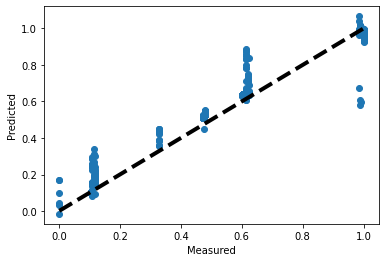

In [32]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()